In [9]:
from causalgraphicalmodels import CausalGraphicalModel
import os
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from itertools import combinations 
import plotnine as p
import statsmodels.api as sm
import statsmodels.formula.api as smf
import linearmodels.iv.model as lm
from linearmodels.iv import IV2SLS
from statsmodels.iolib.summary2 import summary_col
import seaborn as sns

# Reporte N°8
##### Nombre: Valeria Yesquén
##### Código: 20202239


## Ensayo

El artículo se pregunta principalmente por el posible impacto que pueden haber tenido las mitas, que se dieron durante el periodo de 1573-1812, en nuestra sociedad peruana a largo plazo. En ese sentido, la autora plantea un análisis de datos recolectados por medio de encuentras a diversos hogares en las zonas sobre las, según los registros históricos, se instituyeron las mitas (Cordillera de los Andes - Sur del Perú). Asimismo, se aproxima a la data, a través de la aplicación de una regresión discontinua. 

Por consiguiente, la principal fortaleza de utilizar un enfoque de regresión discontinua (semiparamétrico, además), es que permite limitar la muestra y, por ende el análisis, a los distritos ubicados dentro de los cincuenta kilómetros del límite de la mita. De esa manera, es posible identificar los efectos causales, por medio de un modelo de regresión, pues permite distinguir entre el indicador de tratamiento (función no lineal y discontinua de longitud [x] y latitud [y]) y los efectos suaves de la ubicación geográfica. Sin embargo, el enfoque no termina de ser perfecto y por ende, existen debilidades. La principal, reconocida por la autora, es el hecho de que la encuesta realizada a los hogares determinados, brinda poca información para la estimación de modelos flexibles. No obstante, los datos que son agregados, ofrecen evidencia microeconómica conssitente con estudios que establecen una relación entre las instituciones históricas y los resultados económicos contemporáneos. 

Siguiendo esa línea, se puede decir que una de las principales contribuciones que tiene el artículo hacia la materia, es el hecho de que explora la variación en la asignación de una institución histótica en el Perú: mita; para identificar la tenencia de la tierra y los bienes públicos como canales de persistencia. En otras palabras, cubre el vacío en la materia, respecto a los efectos a largo plazo de la mita minera, pues los estudios hasta ese punto, solo se habían centrado en la manera en la que las instituciones históricas explican el subdesarrollo contemporáneo y el impacto de la historia en los resultados económicos, mas no en estos canales de persistencia. 

De igual manera, logra demostrar su hipótesis a cerca de la exitencia de una influencia ejercida por parte de la mita en el consumo doméstico, que ha persistido a través de sus impactos sobre la tenencia de la tierra y el aprovisionamiento de bienes públicos. En ese sentido, los resultados a los que se llegaron, demostraron que la mita ha generado efectos negativos a largo plazo en el consumo doméstico en las zonas donde fue instituida, generando una disminución del mismo, en un 25%. Asimismo, han incrementado el retraso del crecimiento de los niños en un 6%, así como, se demostró que su efecto persiste en canales como: la tenencia de la tierra, los bienes públicos y la participación en el mercado. Finalmente, la autora logró evidenciar, en el artículo, que el estudio de las restricciones acerca de la forma en la que el Estado puede ser utilizado para dar forma a las interacciones económicas es un punto útil. 

Por último, según Nunn (2020), de manera algo más general, la línea de investigación podría continuar, enfocandose en esta area emergente de investigación, que busca tener un mejor entendimiento de la realidad económica contemporánea, a la luz de una perspectiva histórica. Este enfoque plantea que muchas de las diferencias contemporáneas que se ven en la economía de desarrollo comparativa, tienen sus raíces en el pasado distante de los países y/o sociedades en cuestión. En ese sentido, esta vuelta que se le ha dado a la investigación en materia de desarrollo económico, ha resultado de especial importancia al momento de pensar y elaborar políticas que buscan abordar y promover el desarrollo global.

Por otro lado, Acemoglu, Gallego y Robinson (2014) plantean una revisión a la relación entre las instituciones, el capital humano y el desarrollo. Los autores argumentan que los modelos empíricos que tratan las instituciones y el capital humano como exógenos están mal especificados, tanto por los habituales problemas de sesgo de variables omitidas como por el error de medición diferencial de estas variables, y que esta mala especificación es la causa de los elevadísimos rendimientos del capital humano, entre cuatro y cinco veces mayores que los implícitos en las estimaciones micro, encontrados en literatura anterior. En ese sentido, los autores emplean regresiones entre países y regiones para así, mostrar que cuando nos centramos en las diferencias históricas del capital humano y controlamos el efecto de las instituciones, el impacto de las instituciones en el desarrollo a largo plazo es significativo. Finalmente, también demuestran que las diferencias en materia de capital humano de los primeros colonos europeos, no fue un factor importante en el posterior desarrollo institucional de las antiguas colonias.

### Referencias bibliográficas:

- Nunn, N. (2020). The historical roots of economic development. Science, 367(6485), eaaz9986.

- Acemoglu, D., Gallego, F. A., & Robinson, J. A. (2014). Institutions, human capital, and development. Annu. Rev. Econ., 6(1), 875-912.

## Instrumental Variables

### - "Relevance"

Este es uno de los dos supuestos que se deben cumplir para que el uso de las variables instrumentales funcionen. Este supuesto de relevancia implica que existe una parte de $X$, el tretamiento, es explicada o puede ser explicada por $Z$, el instrumento. Caso contrario, la variable instrumental no podría funcionar, pues $Z$ no podría explicar $X$, si es que no existe un parte de $X$ relacionada, o explicada en función de $Z$. Entonces, este supuesto implica que debemos asegurarnos que $Z$ realmente se relaciona con $X$, lo cual podemos comprobar con una simple observación sobre la relación entre ambas variables y ver qué tan fuerte es. En ese sentido, mientras más fuerte dicha relación, mayor confianza se tendrá sobre el supuesto de "relevance"

### - "Validity"

Este es el segundo de los dos supuestos que se deben cumplir para que el uso de las variables instrumentales funcionen. Este supuesto implica que instrumento es una variables que no tiene "back doors" abiertas por sí misma. En otras palabras, cualquier camino entre el instrumento $Z$ y el resultado $Y$ debe pasar por el tratamiento $X$ o estar cerrado. Además, se debe ser capaz de controlar todos esos "caminos". 

## **Ploteo de Histogramas**

In [10]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

def read_data(file): 
    return pd.read_stata("https://raw.github.com/scunning1975/mixtape/master/" + file)

card = read_data("card.dta")
card.head()

,id,nearc2,nearc4,educ,age,fatheduc,motheduc,weight,momdad14,sinmom14,...,KWW,IQ,married,libcrd14,exper,lwage,expersq,u_lwage,lwage_hat,u_educ
0,2.0,0.0,0.0,7.0,29.0,NaN,NaN,158413.0,1.0,0.0,...,15.0,NaN,1.0,0.0,16.0,6.306275,256.0,0.198047,6.108228,-3.067539
1,3.0,0.0,0.0,12.0,27.0,8.0,8.0,380166.0,1.0,0.0,...,35.0,93.0,1.0,1.0,9.0,6.175867,81.0,-0.211160,6.387027,-1.727562
2,4.0,0.0,0.0,12.0,34.0,14.0,12.0,367470.0,1.0,0.0,...,42.0,103.0,1.0,1.0,16.0,6.580639,256.0,0.204719,6.375920,1.012975
3,5.0,1.0,1.0,11.0,27.0,11.0,12.0,380166.0,1.0,0.0,...,25.0,88.0,1.0,1.0,10.0,5.521461,100.0,-0.967905,6.489366,-2.253536
4,6.0,1.0,1.0,12.0,34.0,8.0,7.0,367470.0,1.0,0.0,...,34.0,108.0,1.0,0.0,16.0,6.591674,256.0,0.125173,6.466501,1.090437


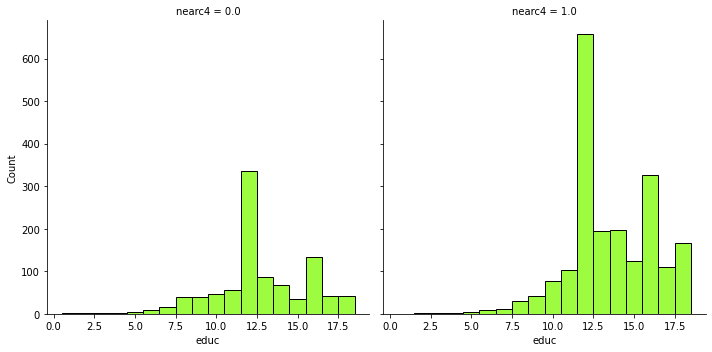

In [8]:
sns.displot(card, x = "educ", col = "nearc4", discrete=True, color = 
            "#7CFC00")

En estos gráficos, se compara los niveles de educación alcanzados, en base a la variable "cercanía a un college de 4 años **(nearc4)**". 

Teniendo en cuenta que cuando dicha situación se da, la variable adopta el valor de 1 y cuando no, el valor de 0, podemos identificar, observando los gráficos, que existe un mayor nivel de educación alcanzado, cuando los hombres se encuentran viviendo relativamente cerca a un college de 4 años. 

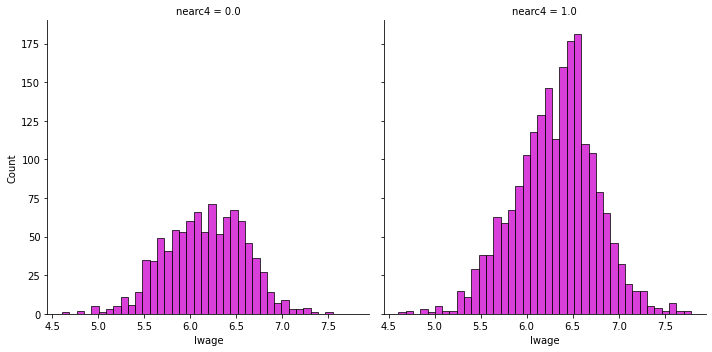

In [11]:
sns.displot(card, x="lwage", col = "nearc4", color = 
            "#CD00CD")

En este caso, se compara el nivel de ingresos alcanzado, en base a la variable "cercanía a un college de 4 años".

En ese sentido, se observa, al igual que en el caso interior, que los hombres perciben un mayor nivel de ingresos, cuando se encuentran o viven cerca a estos college de 4 años.

Entonces, se puede decir, que en base a dicha observación, las probabilidades de percibir mayores ingresos durante la vida adulta, aumentan cuando los sujetos viven cerca a estas instituciones. 

## **Regresiones**

In [12]:
ols_reg = sm.OLS.from_formula("lwage ~ educ + exper + black + south + married + smsa", 
              data = card).fit()

ols_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     219.2
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          1.97e-232
Time:                        06:30:31   Log-Likelihood:                -1273.9
No. Observations:                3003   AIC:                             2562.
Df Residuals:                    2996   BIC:                             2604.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0633      0.064     79.437      0.000       4.938       5.188
educ           0.0712      0.003     20.438      0.000       0.064       0.078
exper          0.0342      0.002     15.422      0.000       0.030       0.038
black         -0.1660      0.018     -9.426      0.000      -0.201      -0.131
south         -0.1316      0.015     -8.788      0.000      -0.161      -0.102
married       -0.0359      0.003    -10.547      0.000      -0.043      -0.029
smsa           0.1758      0.015     11.372      0.000       0.145       0.206
==============================================================================
Omnibus:                       53.196   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.430
Skew:                          -0.231   Prob(JB):                     8.38e-16
Kurtosis:                       3.584   Cond. No.                         154.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

En base a los resultados del OLS, se observa que por cada año adicional de estudios cursado, los ingresos de los sujetos aumentan en un aproximado de 7.1%. Asismismo, la experiencia también aumenta el ingreso de estos en un 3.4%, aproximadamente. 

Sin embargo, también se observan relaciones negativas. Por ejemplo, el hecho de ser de "raza" negra, perjudica al nivel de ingresos percibido, reduciendo este en un aproximado de 16.6%. De igual forma, la tasa de proximidad de las universidades también varía, siendo menor en el sur. Por lo tanto, como ya se estableció arriba, con los gráficos, mientras más proximidad a los colleges, mayores sus tasas de educación e ingresos. Entonces, en los resultados del OLS, se puede ver que el vivir en el sur afecta negativamente el nivel de ingresos, reduciéndolos en un aproximado de 13.1%. Por el contrario, el hecho de vivir en una zona metropolitana (smsa) afecta positivamente al nivel de ingresos, pues estos puede aumentar en un aproximado de 17.6%.  

In [13]:
# There are null values in the dataset, we will fill them with 0
card['married'] = card['married'].fillna(0)

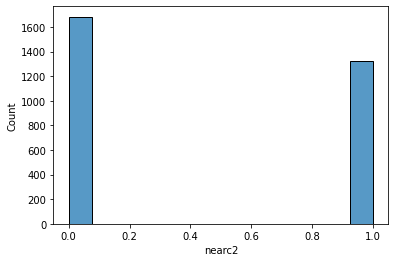

In [14]:
sns.histplot(data=card, x="nearc2")

In [15]:
iv_reg = IV2SLS.from_formula("lwage ~  1 + exper + black + south + married + smsa + [educ ~ nearc2 ]", card).fit()
iv_reg.summary

<class 'linearmodels.compat.statsmodels.Summary'>
"""
                          IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:                  lwage   R-squared:                     -1.3114
Estimator:                    IV-2SLS   Adj. R-squared:                -1.3160
No. Observations:                3010   F-statistic:                    289.62
Date:                Sun, Nov 13 2022   P-value (F-stat)                0.0000
Time:                        06:30:41   Distribution:                  chi2(6)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept      0.1276     3.1412     0.0406     0.9676     -6.0290      6.2843
black          0.1134     0.1816     0.6244     0.5324     -0.2425      0.4692
exper          0.1515     0.0747     2.0274     0.0426      0.0050      0.2980
married       -0.0151     0.0147    -1.0258     0.3050     -0.0438      0.0137
smsa           0.0201     0.1030     0.1949     0.8455     -0.1819      0.2220
south         -0.0319     0.0692    -0.4603     0.6453     -0.1675      0.1038
educ           0.3618     0.1849     1.9562     0.0504     -0.0007      0.7243
==============================================================================

Endogenous: educ
Instruments: nearc2
Robust Covariance (Heteroskedastic)
Debiased: False
"""

En este caso, estimamos el 2SLS, en base a la variable instrumental **(nearc2: cercanía a college de 2 años)**. 

Observando estos datos, encontramos que por cada año adicional de estudios cursado, los ingresos de los sujetos aumentan en un aproximado de 36.1%, resultados mayores al anterior. Asimismo, el valor del F statictic excede 15, por lo tanto, no se puede hablar de que exista un problema de instrumento débil.

En ese sentido, se puede decir que la variable instrumental tiene resultado, por eso los cambios en los coeficientes de la variable "educación", pues, el incluir una variable como la **nearc2**, explica el real impacto que posee la educación en el nivel de ingresos percibido por los sujetos. Esto, porque mientras estén cerca a estos colleges, sus posibilidades de alcanzar mayores niveles de educación aumenta. Por ende, al momento de hablar del impacto que tiene cada año adicional de estudios cursado en los ingresos percibidos, el coeficiente aumenta, indicando que a mayor nivel de educación, mayores serán los ingresos percibidos en el futuro. 